<a href="https://colab.research.google.com/github/mugalan/vibration-analysis/blob/main/assignments/Basic_Vibration_Modeling_Analysis_Sample_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg
import sympy

from sympy import symbols
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting(pretty_print=True)

import plotly.graph_objects as go

#Acknowledgement

Based on an assignment given for  MEE20008 by Swinburne University of Technology, School of Engineering

#Question 1

An engineering company that have been commissioned to design an auto-closing gate for use
in rural settings. Because it is to be used in remote locations, it cannot use any electronics. The engineers have decided
it will therefore be a swinging gate mounted to a vertical post about which it rotates, with a torsional spring that cannot be
adjusted which has a torsional spring constant of $k = 130\,N.m$. They will control the torsional damping with a drum brake
that simply uses friction to slow the gate's rotation. The amount of friction can be controlled by tightening or loosening a
bolt which presses a brake shoe against the drum. Both the torsional spring and the brake can be considered linear. The
gate weighs $75\,kg$, with its centre of mass concentrated at its centre point which is $1.5\,m$ from the vertical post. The initial
settings on the gate brake produce a rotational damping coefficient of $c= 10\,N.m/s$. Your tasks are

* a. If the gate is opened to an angle of $\theta = 30^o$, then released from rest, find the expression for the time history of the
motion of the gate.

* b. Provide an explanation of which vibration phenomenon could be exploited to minimise the time that the gate remains
open and how this could be implemented given the gate design.

* c. For the provided gate, calculate new values of any coefficients that would lead to the minimum open time, and calculate
how long it will take the gate to close from an initial position of $\theta = 30^o$ (the gate can be considered closed when its
position is $\theta= 1^o$).



##Sample Answer

### System Model and Initial Condition Response


Assumin that the horizontal gate position is the equilibrium position of the gate we have

Let $\omega^2_n=\frac{K}{I}$ and $2 \zeta \omega_n=\frac{C}{I}$. Then the above equations take the form
\begin{align}
\ddot{\theta}(t) + 2 \zeta \omega_n \dot{\theta}(t) + \omega^2_n \theta(t)=0.
\end{align}

Taking Laplace transform
of both sides of and using the linearity property of the Laplace transform we have
\begin{align}
\mathfrak{L}\left\{\ddot{\theta}(t) + 2 \zeta \omega_n \dot{\theta}(t) + \omega^2_n \theta(t)\right\}&=\frac{1}{M}\mathfrak{L}\left\{f(t)\right\},\\
(s^2+2 \zeta \omega_n s + \omega_n^2) \Theta(s) - \dot{\theta}(0)- ( s + 2\zeta \omega_n)\theta(0)  &= 0.
\end{align}
This yields
\begin{align}
\Theta(s)=\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \dot{\theta}(0)+\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\theta(0)
\end{align}
Since the Laplace is a one-to-one and onto operator its inverse exists and thus the the solution can be uniquely determined to be $x(t)=\mathfrak{L}^{-1}\{X(s)\}$. Using the linearity property of the inverse we thus have


\begin{align}
\theta(t)&=\dot{\theta}(0)\mathfrak{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+\theta(0)\mathfrak{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}.
\end{align}



For realeasing from rest $\dot{\theta}(0)=$ and hence
\begin{align}
\theta(t)&=\theta(0)\mathfrak{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}.
\end{align}

For underdaped conditions $0\leq\zeta < 1$ by taking  partial fraction expansion we can show that the above expressions reduce to

\begin{align}
\theta_{IC} (t) &=e^{-\zeta \omega_nt}\left(\frac{\theta(0)}{\sqrt{1-\zeta^2}}\sin{(\omega_dt+\phi_{IC})}\right)
\end{align}
where $\omega_d=\omega_n\sqrt{1-\zeta^2}$, $\phi_{IC}=\arcsin\left({\sqrt{1-\zeta^2}}\right)$

Whent $\zeta=1$, that is when the system is critically damped
\begin{align}
\theta_{IC} (t) &=\theta(0) \left( e^{-\omega_n t} + \omega_n t e^{-\omega_n t} \right) = \theta(0) \, e^{-\omega_n t} (1 + \omega_n t)
\end{align}


### a) Time history of the gate when $\theta(0)=30^o$ and $\dot{\theta}(0)=0$

In [ ]:
M=75; L=1.5; K=130; C=10; I=M*L**2; theta0=30;
wn=np.sqrt(K/I);
zeta=C/(I*2*wn)
print(zeta)

0.033757978902788886


In [ ]:
Delta_s=[1, 2*zeta*wn, wn**2];
np.roots(Delta_s)

array([-0.02962963+0.87720719j, -0.02962963-0.87720719j])

Since $\zeta = 0.0337< 1$ the analytinc expression for the time response of the graph is:

\begin{align}
\theta_{IC} (t) &=e^{-\zeta \omega_nt}\left(\frac{\theta(0)}{\sqrt{1-\zeta^2}}\sin{(\omega_dt+\phi_{IC})}\right)
\end{align}
where $\omega_d=\omega_n\sqrt{1-\zeta^2}$, $\phi_{IC}=\arcsin\left({\sqrt{1-\zeta^2}}\right)$

####The plot of the time history is:

In [ ]:
zeta=C/(I*2*wn)
wd=wn*np.sqrt(1-zeta**2); phi_IC=np.arcsin(1-zeta**2); x0=np.deg2rad(theta0);
t=np.linspace(0,100,1000);
x_IC=np.exp(-zeta*wn*t)*((x0/(np.sqrt(1-zeta**2)))*np.sin(wd*t+phi_IC))   #np.exp(-zeta*wn*t);
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=x_IC, mode='lines+markers', name='x'))
fig.update_layout(title='Initial Condition Response', xaxis=dict(title='Time / t'), yaxis=dict(title=r'$\theta_{IC}(t)$'))
fig.show()

### b) Minimising the time that the gate remains open

The inimum gate opening time occurs when the system is criticall damped. That is when $\zeta=1$. Then:

\begin{align}
\theta_{IC} (t) &= \theta(0) \, e^{-\omega_n t} (1 + \omega_n t)
\end{align}

This could be implemented by increasing the damping. That is by tightening the screw so that $C=I*(2*\omega_n)=2\sqrt{KI}$

In [ ]:
x0=np.deg2rad(theta0);
t=np.linspace(0,20,1000);
x_IC=x0*np.exp(-wn*t)*(1+wn*t)   #np.exp(-zeta*wn*t);
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=x_IC, mode='lines+markers', name='x'))
fig.update_layout(title='Critically Damped Initial Condition Response', xaxis=dict(title='Time / t'), yaxis=dict(title=r'$\theta_{IC}(t)$'))
fig.show()

### c) How to get critical damping

$C=I*(2*\omega_n)=2\sqrt{KI}$

In [ ]:
C=2*np.sqrt(K*I)
print(C)

296.2262648719725


$C\approx 296.2 \,Nm/s$

If gate closing time is $t_s$ then
\begin{align}
\theta_{IC} (t_s) &= \theta(0) \, e^{-\omega_n t_s} (1 + \omega_n t_s)=\pi/180
\end{align}
\begin{align}
e^{-\omega_n t_s} (1 + \omega_n t_s)=1/30
\end{align}
The approximate solution of this is
\begin{align}
t_s \approx \frac{5.2307}{\omega_n}=5.2307\sqrt{\frac{I}{K}}
\end{align}

In [ ]:
t_s=5.2307*np.sqrt(I/K)
print(t_s)

5.959502783330102


Approximate gate closing time is 6s.

# Question 2

An international car company is importing cars into Australia. The car has a unique sensor that consists of a very small,
rectangular cross-section mounted as a cantilever beam, mounted horizontally, with the sensor in a small block mounted
at the free end. The sensor block weighs $10\,g$. The company has discovered that this sensor keeps breaking in Australian
conditions on coarse-chip bitumen roads that have an average aggregate (or pebble) size of $14\,mm$, particularly on roads
where the speed limit is $80\,km/h$. An Engineering company have been commissioned to try to solve this problem. They have
started by trying to measure the force on the sensor block when driving; the data are hard to obtain, but they have been
able to ascertain that the force oscillates with an amplitude of $F_0 = 1.4\,N$ and can be approximated by a cosine function.
Your tasks are

* a. Provide a diagram of the setup of the problem, identifying the important components and coefficients.
* b. Provide a reason why the sensor fails specifically when the car travels at 80km/h in terms of vibration phenomena.
* c. Provide an estimate of the equivalent spring stiffness of the cantilever beam that holds the sensor. Assume there is no
damping.
* d. If the sensor fails when its displacement from its neutral position exceeds 1cm, calculate how long it will take for the
sensor to fail once the oscillatory force is applied.


##Sample Answer

###Mathematical Model of the system and the analytical solutionLet $\omega^2_n=\frac{K}{M}$ and $2 \zeta \omega_n=\frac{C}{M}$. Then the above equations take the form
\begin{align}
\ddot{x}(t) + 2 \zeta \omega_n \dot{x}(t) + \omega^2_n x(t)= \frac{1}{M}F(t).
\end{align}



For a given $f(t)$ that does not grow faster than an exponential function it can be shown, owing to the linearity of the system, that the solution will also not grow
faster than an exponential function. Thus taking Laplace transform
of both sides of and using the linearity property of the Laplace transform we have
\begin{align}
\mathfrak{L}\left\{\ddot{x}(t) + 2 \zeta \omega_n \dot{x}(t) + \omega^2_n x(t)\right\}&=\frac{1}{M}\mathfrak{L}\left\{f(t)\right\},\\
(s^2+2 \zeta \omega_n s + \omega_n^2) X(s) - \dot{x}(0)- ( s + 2\zeta \omega_n)x(0)  &= \frac{1}{M} F(s).
\end{align}
This yields
\begin{align}
X(s)=\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \dot{x}(0)+\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}x(0)
+\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s).
\end{align}
Since the Laplace is a one-to-one and onto operator its inverse exists and thus the the solution can be uniquely determined to be $x(t)=\mathfrak{L}^{-1}\{X(s)\}$. Using the linearity property of the inverse we thus have


\begin{align}
x(t)&=\dot{x}(0)\mathfrak{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+x(0)\mathfrak{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}+\mathfrak{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}.
\end{align}


Observe that the first two terms depend on the initial conditions and do not depend on the forcing while the last term does depend on the forcing but is in depend of the initial conditions. Therefore
we may breakup the solution into two parts such that $x(t)=x_{IC}(t)+x_f(t)$ where
\begin{align}
x_{IC}(t)&=\dot{x}(0)\mathfrak{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+x(0)\mathfrak{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}, \\
x_f(t)&=\mathfrak{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}.
\end{align}

Assuming light damping we have that the system steady state forced response is approximately

\begin{align}
x_{ss}(t)&=\mathfrak{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}.
\end{align}

When the forcing is of the form $F_0\cos{\omega t}$ and assuming under damped conditions we have from partial fraction expansions and the inverse Laplace transform:

Thus it can be shown that the steady state response of the system for sinusoidal forcing is
\begin{align}
x_{ss}(t)=\chi(\omega)\,F_0\,\cos(\omega t +\phi(\omega))\:1(t),
\end{align}
where
\begin{align}
\chi(\omega)=\frac{1/M}{\sqrt{(\omega_n^2-\omega^2)^2+4\zeta^2\omega^2\omega_n^2}}
\end{align}
and
\begin{align}
\phi(\omega)=\arctan{\left(\frac{2\zeta\omega\omega_n}{\omega_n^2-\omega^2}\right)}.
\end{align}
Thus we see that the steady state response to sinusoidal forcing is also sinusoidal with frequency of oscillation equal to that of the forcing frequency $\omega$. However it differs from the forcing in two distinct ways. One is that the amplitude of the steady state solution is $\chi(\omega)$ times the magnitude of the forcing while the other is that the phase of the steady state solution is shifted by $\phi(\omega)$ from the phase of the forcing. It is also important to note that the amplitude magnification and the phase shift depend on the forcing frequency $\omega$. We will see that this observation has crucial implications for vibration analysis and control system design.

One can show that $\chi(\omega)$ is maximum when
\begin{align}
\omega=\omega_r=\omega_n\sqrt{1-2\zeta^2},
\end{align}
and that the maximum amplitude of vibration is given by
\begin{align}
{x_{ss}}_{max}=\frac{F_0/M}{2\zeta\omega_n^2\sqrt{1-\zeta^2}}.
\end{align}


### b) Reason why the sensor fails

The sensor fails due to the fact that it goes into resonance when the vegicle is moving at $80\,km/h$ over a road with $14\,mm$  aggregate.

A coarse chip-seal road has periodic bumps (average stone spacing ≈ stone size ≈ 14 mm).

At 80 km/h, the number of bumps the tire hits per second gives the excitation frequency:

$f = \frac{v}{d}$

Where: $v = 80\,\text{km/h} = \frac{80000}{3600} = 22.22\,\text{m/s} $ and $d = 14\,\text{mm} = 0.014\,\text{m}$. Thus the frequency of occillation of the vehicle under these conditions is

$f = \frac{22.22}{0.014} \approx 1587\,\text{Hz}$.

Thus the resonance frequency of the cantelever can be assumed to

\begin{align}
\omega_r=\omega_n\sqrt{1-2\zeta^2} \approx 2\pi f
\end{align}


In [ ]:
omega_r=2*np.pi*1587
print(omega_r)

9971.415082494002


### c) If Damping is negligible estimate $K$

If the damping is negligible from the above expression we have that
$\sqrt{\frac{K}{M}}=\omega_n\approx \omega_r\approx 2\pi f$ where $M=0.01$. Thus
\begin{align}
K\approx M\omega_r^2 \approx M(2\pi f)^2
\end{align}

In [ ]:
M=0.01
K=M*omega_r**2
print(K)

994291.1874738887


The cantelever spring constant is:
$K\approx 994.3 \, kN/m$

### d) Failiure time

For this we assume no damping and $\omega=\omega_n$. Then

\begin{align}
x_{ss}(t) = \mathfrak{L}^{-1} \left\{ \frac{F_0 s / M}{(s^2 + \omega_n^2)^2} \right\}
\end{align}

Using the identity (from Laplace tables):

\begin{align}
x_{ss}(t) = \mathfrak{L}^{-1} \left\{ \frac{s}{(s^2 + \omega_n^2)^2} \right\} = \frac{t}{2\omega_n} \sin(\omega_nt)
\end{align}

If the max amplitude before failiure is $x_{max}$ we have

\begin{align}
t_{failure}=2\omega_nx_{max}
\end{align}

In [ ]:
x_max=0.01
t_fail=2*omega_r*x_max
print(t_fail)

199.42830164988004


Time to failure is approximately 200 seconds

#Question3

An Engineering company is bidding for a contract to build offshore wind turbines. They are proposing a new method for the
construction of the mounting for the turbine tower on the sea floor, that involves pounding $500\,kg$ concrete blocks into the
sea bed. The industrial hammer (which is basically a 50kg block) which is used to do this is designed so that the hammer and concrete block sticks together and move as a single body immediately after impact.
The sea bed is such that it can be modelled as a spring and a damper, with stiffness $k = 20k\,N/m$, and a damping ratio
$\zeta = 0.1$.
Meeswin need to ensure that the force exerted on the sea bed does not exceed $F_{max} = 600\,N$, to avoid irreversible
ecological damage. Your tasks are:

* a. Devise a model for this setup, and sketch a diagram identifying the key components and coefficients.
* b. Produce the mathematical model for this setup.
* c. Solve this mathematical model for the maximum hammer speed that can be used while limiting the force exerted on
the sea bed to an acceptable level.


##Sample Answer

### a) Model Schematic

The concrete block of mass $M$ and the seabed as a spring $K$ and damper $C$ can be modelled as a spring mass damper system

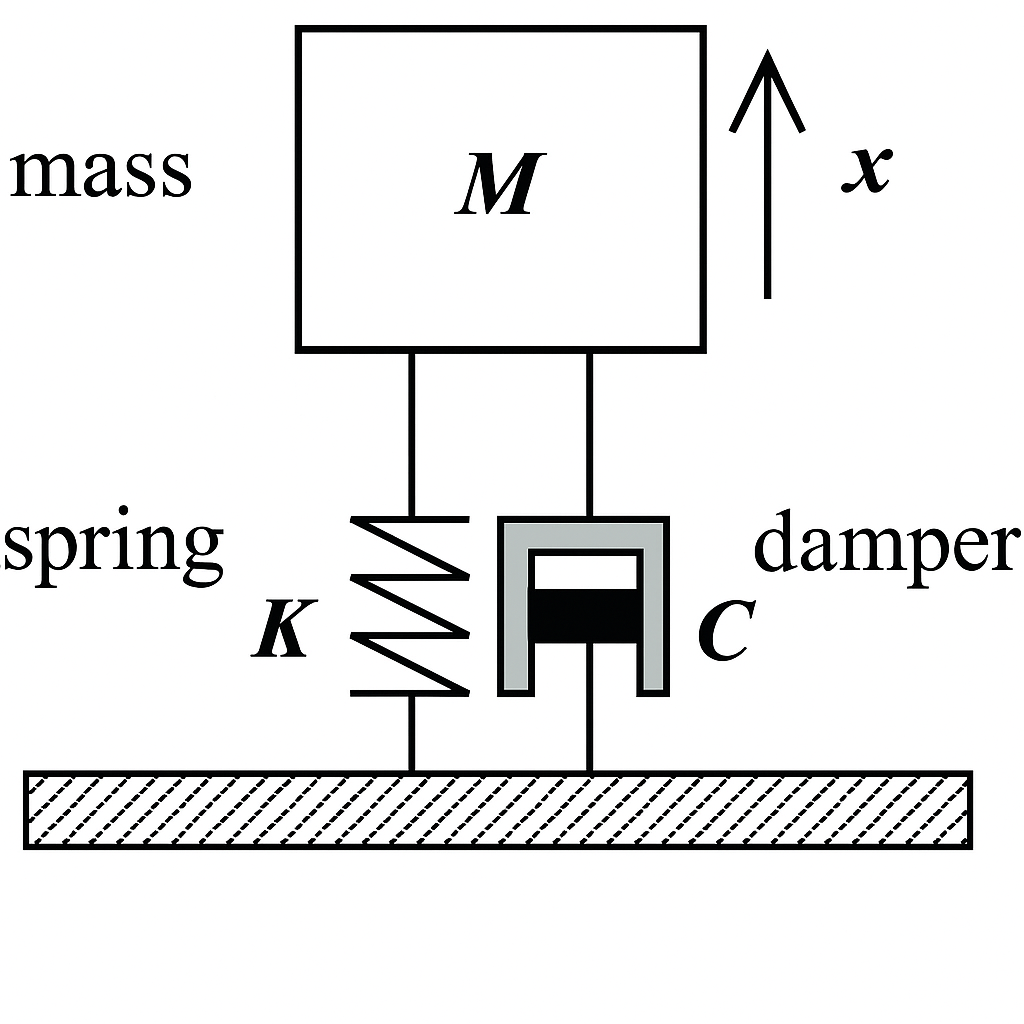

###b) Mathematical model of the problem

Modelling the sea bed+concrete block as a mass-spring-damper system impacted by a falling hammer. The second-order differential equation governing such a system under a forcing function $F(t)$ is:

\begin{align}
\ddot{x}(t) + 2\zeta \omega_n \dot{x}(t) + \omega_n^2 x(t) = \frac{1}{M}F(t)
\end{align}

Where: $x(t)$ is the displacement of the $500\,kg$ concrete block+hammer (blocak mass $M = 500\, \text{kg}$, hammer mass $m = 50\, \text{kg},)$, $\zeta = 0.1$ is the damping ratio, $k = 20000\, \text{N/m} \Rightarrow \omega_n = \sqrt{\frac{k}{M+m}}$, $F(t)$ is the external force applied by the $m=50\,kg$ hammer via impulse.

Given that the hammer strike is instantaneous and delivers an impulse $J = m v$, the forcing term F(t) can be modeled using the Dirac delta function:

\begin{align}
F(t) = m v\, \delta(t)
\end{align}



### c) Solve this mathematical model for the maximum hammer speed

The impulse response of this system is
\begin{align}
x(t) = \frac{mv}{(M+m)\omega_d} e^{-\zeta \omega_n t} \sin(\omega_d t)= \frac{v_0}{\omega_d} e^{-\zeta \omega_n t} \sin(\omega_d t)
\end{align}
where $\omega_d = \omega_n \sqrt{1 - \zeta^2}$ and $v_0=\frac{mv}{(M+m)}$.

The force exerted to the sea bed is
\begin{align}
F_{\text{exerted}} &=-kx-c\dot{x}\\
 &= -k \left( \frac{v_0}{\omega_d} e^{-\zeta \omega_n t} \sin(\omega_d t) \right)
	-	c \left( v_0 e^{-\zeta \omega_n t} \left[ \cos(\omega_d t) - \frac{\zeta \omega_n}{\omega_d} \sin(\omega_d t) \right] \right)\\
&= -v_0 e^{-\zeta \omega_n t} \left[
\left( \frac{k}{\omega_d} - c \frac{\zeta \omega_n}{\omega_d} \right) \sin(\omega_d t) + c \cos(\omega_d t)
\right] \\
&=
-v_0\, e^{-\zeta \omega_n t} \left[
\left( \frac{k - c \zeta \omega_n}{\omega_d} \right) \sin(\omega_d t)
	-	c \cos(\omega_d t)
\right]\\
& = -v_0 R e^{-\zeta \omega_n t} \sin(\omega_d t + \phi)
\end{align}

where
\begin{align}
R &= \sqrt{\frac{k^2 (1 - 2\zeta^2)^2}{\omega_d^2} + 4 \zeta^2 k (M + m)}\\
\phi &= \tan^{-1}\left(
\frac{2 \zeta \omega_d \sqrt{k(M + m)}}{k(1 - 2\zeta^2)}
\right)
\end{align}

Where $t_{\text{peak}}$ is when $\sin(\omega_d t + \phi) = -1$, i.e.,

\begin{align}
\omega_d t_{\text{peak}} + \phi = \frac{3\pi}{2} \Rightarrow t_{\text{peak}} = \frac{3\pi/2 - \phi}{\omega_d}
\end{align}

Thus
\begin{align}
F_{\text{max}} &= v_0 R \cdot e^{-\zeta \omega_n t_{\text{peak}}}\\
& = v_0 R \cdot \exp\left( -\zeta \omega_n \cdot \frac{3\pi/2 - \phi}{\omega_d} \right)\\
& = \frac{m}{M + m} v \cdot \sqrt{ \frac{k^2 (1 - 2\zeta^2)^2}{\omega_d^2} + 4 \zeta^2 k (M + m) } \cdot \exp\left( -\zeta \omega_n \cdot \frac{3\pi/2 - \tan^{-1} \left( \frac{2 \zeta \omega_d \sqrt{k(M + m)}}{k (1 - 2\zeta^2)} \right) }{\omega_d} \right)
\end{align}
So the maximum force exerted on the seabed is approximately linear in velocity.

In [ ]:
import sympy as sp

# Define symbols
v = sp.Symbol('v', real=True, positive=True)
m, M, k, zeta = sp.symbols('m M k zeta', real=True, positive=True)

# Intermediate quantities
omega_n = sp.sqrt(k / (M + m))
omega_d = omega_n * sp.sqrt(1 - zeta**2)
v0 = (m / (M + m)) * v

# Simplify A and B
A = (k * (1 - 2 * zeta**2)) / omega_d
B = 2 * zeta * omega_n * (M + m)

# Amplitude R
R = sp.sqrt(A**2 + B**2)

# Phase angle phi
phi = sp.atan(B / A)

# t_peak and exponential decay
t_peak = (3 * sp.pi / 2 - phi) / omega_d
decay = sp.exp(-zeta * omega_n * t_peak)

# Final expression for F_max
F_max = v0 * R * decay

# Optional: substitute numerical values
params = {
    m: 50,
    M: 500,
    k: 20000,
    zeta: 0.1
}

F_max_numeric = F_max.subs(params).simplify()

# Print symbolic expression in terms of v
print("F_max(v) =")
sp.pprint(F_max_numeric)

F_max(v) =
                    -0.150755672288882⋅π
309.193476882998⋅v⋅ℯ                    


So the maximum force exerted to the sea bed is $F_{\text{max}}(v) \approx 192.6 \cdot v$. Since $F_{\text{max}}=600\,N$ we have $v_max\approx 600/192.6\,m/s=3.12 \,m/s$